# Training the model

In [2]:
import numpy as np
import pandas as pd
from Model.losses import SoftmaxCrossEntropyWithLogits
from Model.network import MNIST_classifier_convolution
from Model.optimizer import SGDOptimizer
from Model.scheduler import LinearScheduler
from Preprocessing.augmentations import Augmentator, Transforms
from Preprocessing.dataloader import MNISTDataLoader
from Preprocessing.dataset import MNISTDataset
from utils import one_hot_encode_list
from utils import plot_performance
from utils import train_test_split

# Parsing the arguments
data_dir = "mnist"
batch_size = 100
lr = 0.1
num_epochs = 10
random_state = 42
augentations = False

# Files which contains data and labels
data_path = f'{data_dir}/mnist_data.csv'
labels_path = f'{data_dir}/mnist_labels.csv'

# Reading and reshaping th data
data = (pd.read_csv(data_path).values.astype(np.float32) / 255.0)
data = data.reshape(-1, 1, 28, 28)
# Reading and one-hot encoding the target values
targets = pd.read_csv(labels_path).values.astype(np.int64)
targets = one_hot_encode_list(targets)

# Splitting data into train validation and test set ( 70% train 10% validation 20% test)
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125)

train_dataset = MNISTDataset(X_train, y_train)
val_dataset = MNISTDataset(X_val, y_val)
test_dataset = MNISTDataset(X_test, y_test)

# Adding augmentations if needed
augmentator = None
if augentations:
    transforms = [(Transforms.random_rotation, 0.2)]
    augmentator = Augmentator(transforms=transforms)

# Creating loaders for the datasets
train_loader = MNISTDataLoader(train_dataset, batch_size=batch_size, shuffle=True, augmentator=augmentator)
val_loader = MNISTDataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = MNISTDataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(
    f"Train dataset size: {len(train_dataset)}\nVal dataset size: {len(val_dataset)}\nTest dataset size: {len(test_dataset)}", flush=True)

# Initializing scheduler
scheduler = LinearScheduler(initial_lr=lr)
# Initializing optimizer
optimizer = SGDOptimizer()
# Initializing loss
loss = SoftmaxCrossEntropyWithLogits()

# Shape of inputs for network to know which kind of data to expect
inputs = np.expand_dims(data[0], axis=0)

# Initializing the model
model = MNIST_classifier_convolution(inputs)

# Training the model
train_accuracies, train_losses, val_accuracies, val_losses = model.train(loss=loss, num_epochs=num_epochs,
                                                                       train_loader=train_loader,
                                                                       scheduler=scheduler,
                                                                       val_loader=val_loader, optimizer=optimizer)

Train dataset size: 49000
Val dataset size: 7000
Test dataset size: 14000


Epoch 1/10, Train Accuracy: 92.734%, Train Loss: 0.00064: 100%|███| 490/490 [03:00<00:00,  2.71it/s]


Epoch 1/10, Val Accuracy: 97.514%, Val Macro F1: 98.073%, Val Micro F1: 97.507%


Epoch 2/10, Train Accuracy: 97.946%, Train Loss: 0.00050: 100%|███| 490/490 [03:24<00:00,  2.39it/s]


Epoch 2/10, Val Accuracy: 97.914%, Val Macro F1: 98.652%, Val Micro F1: 97.901%


Epoch 3/10, Train Accuracy: 98.719%, Train Loss: 0.00034: 100%|███| 490/490 [03:15<00:00,  2.50it/s]


Epoch 3/10, Val Accuracy: 98.386%, Val Macro F1: 98.406%, Val Micro F1: 98.374%


Epoch 4/10, Train Accuracy: 98.896%, Train Loss: 0.00022: 100%|███| 490/490 [03:14<00:00,  2.51it/s]


Epoch 4/10, Val Accuracy: 98.471%, Val Macro F1: 98.667%, Val Micro F1: 98.461%


Epoch 5/10, Train Accuracy: 99.156%, Train Loss: 0.00019: 100%|███| 490/490 [03:17<00:00,  2.48it/s]


Epoch 5/10, Val Accuracy: 98.514%, Val Macro F1: 98.864%, Val Micro F1: 98.504%


Epoch 6/10, Train Accuracy: 99.218%, Train Loss: 0.00022: 100%|███| 490/490 [03:18<00:00,  2.47it/s]


Epoch 6/10, Val Accuracy: 98.586%, Val Macro F1: 98.864%, Val Micro F1: 98.574%


Epoch 7/10, Train Accuracy: 99.297%, Train Loss: 0.00015: 100%|███| 490/490 [03:20<00:00,  2.45it/s]


Epoch 7/10, Val Accuracy: 98.643%, Val Macro F1: 98.798%, Val Micro F1: 98.633%


Epoch 8/10, Train Accuracy: 99.347%, Train Loss: 0.00006: 100%|███| 490/490 [03:21<00:00,  2.43it/s]


Epoch 8/10, Val Accuracy: 98.700%, Val Macro F1: 98.864%, Val Micro F1: 98.692%


Epoch 9/10, Train Accuracy: 99.383%, Train Loss: 0.00007: 100%|███| 490/490 [03:19<00:00,  2.45it/s]


Epoch 9/10, Val Accuracy: 98.700%, Val Macro F1: 98.866%, Val Micro F1: 98.690%


Epoch 10/10, Train Accuracy: 99.391%, Train Loss: 0.00060: 100%|██| 490/490 [03:19<00:00,  2.46it/s]


Epoch 10/10, Val Accuracy: 98.729%, Val Macro F1: 98.930%, Val Micro F1: 98.719%


# Visualizing performances on train and validation set

In [3]:
from matplotlib import pyplot as plt

def plot_performance(train_accuracies, train_losses, val_accuracies, val_losses):
    plt.style.use('ggplot')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    
    # Plot train accuracy and validation accuracy
    plt.plot(train_accuracies, label='Train Accuracy', marker='o', linestyle='-')
    plt.plot(val_accuracies, label='Validation Accuracy', marker='x', linestyle='-')
    
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train and Validation Accuracies Over Epochs')
    plt.legend()
    
    # Customize grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    plt.subplot(1, 2, 2)
    
    # Plot train loss and validation loss
    plt.plot(train_losses, label='Train Loss', marker='o', linestyle='-')
    plt.plot(val_losses, label='Validation Loss', marker='x', linestyle='-')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train and Validation Losses Over Epochs')
    plt.legend()

    # Customize grid lines
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

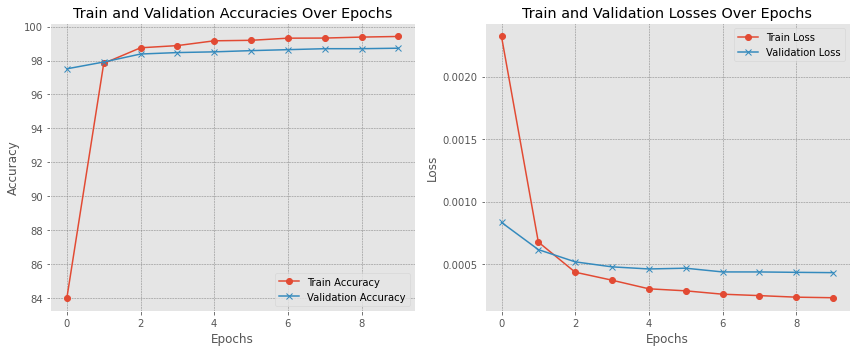

In [4]:
plot_performance(train_accuracies, train_losses, val_accuracies, val_losses)

# Testing the model on the test set and visualizing the mistakes

In [5]:
# Loading the weights from the best validation epoch score
model.load_parameters(filename=f"ModelWeights/{model.name}_{num_epochs}_best_val_weights.pkl")

# Testing the model
accuracy, micro_f1, macro_f1, _, wrong_predictions = model.test(test_loader=test_loader, loss=loss)
print("-----------------------")
print(f"Test accuracy: {accuracy:.3f}%\nTest micro-f1: {micro_f1:.3f}%\nTest macro-f1: {macro_f1:.3f}%")

-----------------------
Test accuracy: 98.679%
Test micro-f1: 99.281%
Test macro-f1: 98.678%


In [6]:
from utils import plot_wrong_predictions
from utils import plot_class_errors

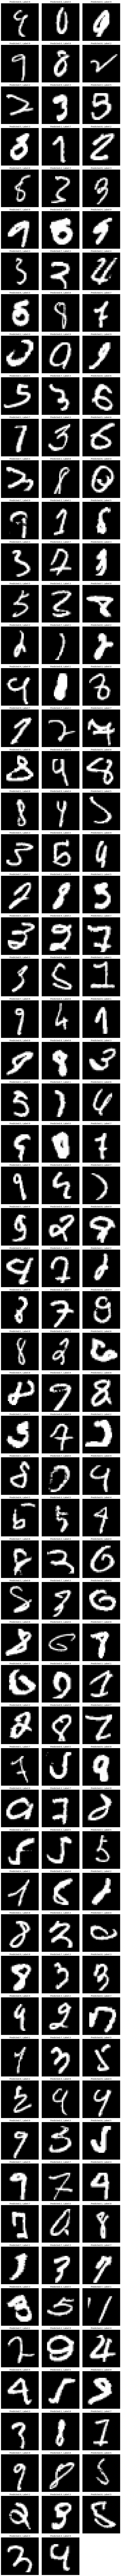

In [8]:
plot_wrong_predictions(wrong_predictions=wrong_predictions)

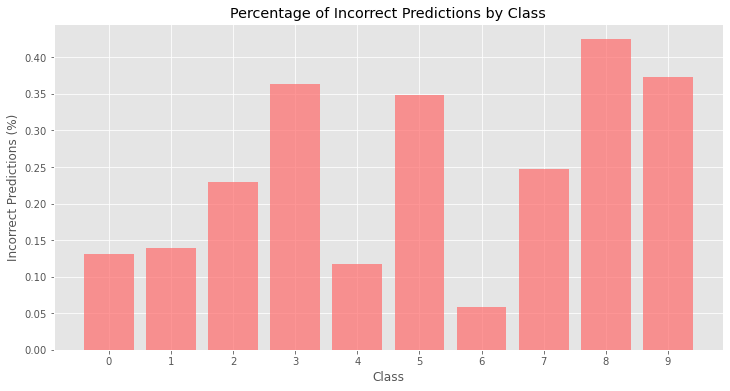

In [12]:
targets = pd.read_csv(labels_path).values.astype(np.int64)
test_labels = targets.ravel()
plot_class_errors(wrong_predictions=wrong_predictions, test_labels=test_labels)